In [3]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random


In [4]:
euro = "data/Euro_6_CLEAN.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,161.0
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,153.0
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,169.0
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,162.0
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,02-Jul-21,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6330,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0
6331,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6332,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0


In [5]:
# Pie Chart formatting
colors = ["red", "orange", "lightcoral", "lightskyblue", "purple", "pink","green", "yellow"]

explode = (0.1, 0, 0, 0.1, 0.1, 0.1, 1, 1)

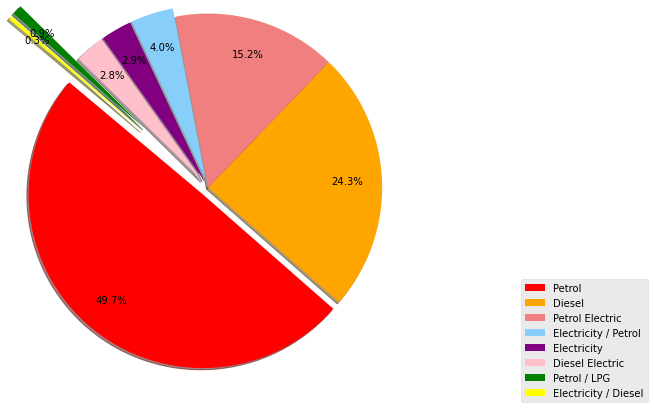

In [6]:
counts = euro_df["Fuel Type"].value_counts()
plt.pie(counts.values, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20,labels=counts.index.values)


plt.show() 

In [7]:
# checking Date of change type
euro_df.dtypes

Manufacturer                              object
Model                                     object
Description                               object
Transmission                              object
Manual or Automatic                       object
Engine Capacity                          float64
Fuel Type                                 object
Powertrain                                object
Engine Power (PS)                        float64
Engine Power (Kw)                        float64
Electric energy consumption Miles/kWh    float64
wh/km                                    float64
Maximum range (Km)                       float64
Maximum range (Miles)                    float64
Euro Standard                             object
Diesel VED Supplement                       bool
Testing Scheme                            object
WLTP Imperial Low                        float64
WLTP Imperial Medium                     float64
WLTP Imperial High                       float64
WLTP Imperial Extra 

In [8]:
#Converting the 'Date of change' coulmn from object to datetime
euro_df["Date of change"] = pd.to_datetime(euro_df["Date of change"])
print (euro_df.dtypes)

Manufacturer                                     object
Model                                            object
Description                                      object
Transmission                                     object
Manual or Automatic                              object
Engine Capacity                                 float64
Fuel Type                                        object
Powertrain                                       object
Engine Power (PS)                               float64
Engine Power (Kw)                               float64
Electric energy consumption Miles/kWh           float64
wh/km                                           float64
Maximum range (Km)                              float64
Maximum range (Miles)                           float64
Euro Standard                                    object
Diesel VED Supplement                              bool
Testing Scheme                                   object
WLTP Imperial Low                               

In [9]:
#Adding a 'year of change column' to showcase the years 
euro_df ["year_of_change"] = euro_df['Date of change'].dt.year
euro_df

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2,year_of_change
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,39.0,20.0,59.0,NaN,NaN,NaN,74.0,2022-02-09,161.0,2022
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,39.0,20.0,59.0,NaN,NaN,NaN,74.0,2022-02-09,153.0,2022
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2020-10-05,169.0,2020
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2020-10-05,162.0,2020
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2021-07-02,169.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,6.0,9.0,14.0,0.22,NaN,NaN,67.0,2021-08-13,76.0,2021
6330,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,6.0,9.0,14.0,0.22,NaN,NaN,67.0,2021-08-13,57.0,2021
6331,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,6.0,9.0,14.0,0.22,NaN,NaN,67.0,2021-08-13,76.0,2021
6332,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,6.0,9.0,14.0,0.22,NaN,NaN,67.0,2021-08-13,57.0,2021


In [10]:
#Filtering the year of change coulumn by 2019
Filtered_df_2019 = euro_df[euro_df.year_of_change == 2019]
Filtered_df_2019.head()


,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2,year_of_change
180,ASTON MARTIN LAGONDA,DB11 V12 AMR Coupe 2019.5MY,Coupe,A8,Automatic,5204.0,Petrol,Internal Combustion Engine (ICE),630.0,470.0,...,33.0,18.0,51.0,NaN,126.0,126.0,70.3,2019-12-11,303.0,2019
181,ASTON MARTIN LAGONDA,DB11 V8 Coupe 2019.5MY,Coupe,A8,Automatic,3982.0,Petrol,Internal Combustion Engine (ICE),503.0,375.0,...,41.0,11.0,52.0,NaN,126.0,126.0,72.0,2019-12-11,244.0,2019
182,ASTON MARTIN LAGONDA,DB11 V8 Volante 2019.5MY,Convertible,A8,Automatic,3982.0,Petrol,Internal Combustion Engine (ICE),503.0,375.0,...,29.0,16.0,45.0,NaN,126.0,126.0,73.0,2019-12-11,263.0,2019
183,ASTON MARTIN LAGONDA,DBS Superleggera 2019MY,Coupe,A8,Automatic,5204.0,Petrol,Internal Combustion Engine (ICE),715.0,533.0,...,29.0,17.0,46.0,NaN,126.0,126.0,72.0,2019-12-04,306.0,2019
186,ASTON MARTIN LAGONDA,DBS Superleggera Volante 2020MY,Convertible,A8,Automatic,5204.0,Petrol,Internal Combustion Engine (ICE),715.0,533.0,...,26.0,21.0,47.0,NaN,126.0,126.0,72.0,2019-12-11,306.0,2019


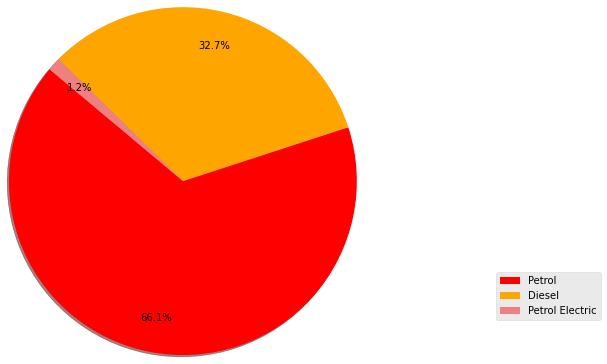

In [21]:
#Plotting a pie chart based on the fuel type popularity in 2019
counts1 = Filtered_df_2019["Fuel Type"].value_counts()
plt.pie(counts1.values, explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20,labels=counts1.index.values)
plt.show() 

In [13]:
#Filtering the year of change coulumn by 2020
Filtered_df_2020 = euro_df[euro_df.year_of_change == 2020]
Filtered_df_2020.head()

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2,year_of_change
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2020-10-05,169.0,2020
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2020-10-05,162.0,2020
6,ABARTH,595,595 1.4 TJET 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2020-10-05,169.0,2020
7,ABARTH,595,595 1.4 TJET 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2020-10-05,162.0,2020
8,ABARTH,595,595 Competizione 180 BHP Hatchback,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,132.0,...,33.0,16.0,49.0,NaN,NaN,NaN,71.5,2020-10-05,171.0,2020


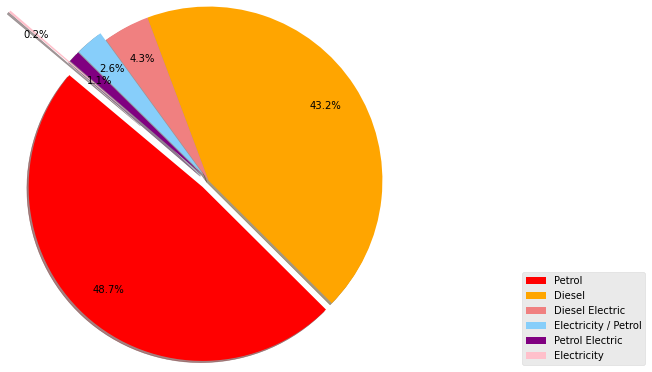

In [24]:
#Plotting a pie chart based on the fuel type popularity in 2020
explode1=(0.1, 0, 0, 0.1, 0.1, 1,)
counts2 = Filtered_df_2020["Fuel Type"].value_counts()
plt.pie(counts2.values, explode=explode1, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20, labels=counts2.index.values)
plt.show() 

In [16]:
#Filtering the year of change coulumn by 2021
Filtered_df_2021 = euro_df[euro_df.year_of_change == 2021]
Filtered_df_2021.head()

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2,year_of_change
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2021-07-02,169.0,2021
5,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,52.0,27.0,79.0,NaN,NaN,NaN,73.5,2021-07-02,162.0,2021
12,ABARTH,595,595 Competizione 1.4 TJET 180 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,132.0,...,33.0,16.0,49.0,NaN,NaN,NaN,71.5,2021-07-02,171.0,2021
13,ABARTH,595,595 Comperizione 1.4 TJET 180 BHP Convertible,SAT5,Automatic,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,132.0,...,22.0,16.0,38.0,NaN,NaN,NaN,74.0,2021-07-02,172.0,2021
110,ALFA ROMEO,Stelvio,2.0 Turbo petrol 280hp AWD VELOCE (206kw),A8,Automatic,1995.0,Petrol,Internal Combustion Engine (ICE),280.0,206.0,...,37.0,32.0,69.0,NaN,NaN,NaN,67.0,2021-07-02,219.0,2021


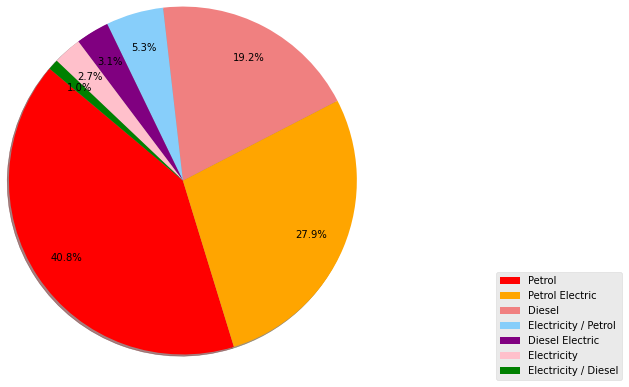

In [17]:
#Plotting a pie chart based on the fuel type popularity in 2021
counts3 = Filtered_df_2021["Fuel Type"].value_counts()
plt.pie(counts3.values,explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20, labels=counts3.index.values)
plt.show() 

In [18]:
#Filtering the year of change coulumn by 2022
Filtered_df_2022 = euro_df[euro_df.year_of_change == 2022]
Filtered_df_2022.head()

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2,year_of_change
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,39.0,20.0,59.0,NaN,NaN,NaN,74.0,2022-02-09,161.0,2022
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,39.0,20.0,59.0,NaN,NaN,NaN,74.0,2022-02-09,153.0,2022
40,ABARTH,595,COMPETIZIONE 1.4 TJET 180bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,132.0,...,35.0,18.0,53.0,NaN,NaN,NaN,72.0,2022-02-09,156.0,2022
41,ABARTH,595,COMPETIZIONE 1.4 TJET 180bhp,SAT5,Automatic,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,132.0,...,26.0,18.0,44.0,NaN,NaN,NaN,74.0,2022-02-09,165.0,2022
42,ABARTH,595,COMPETIZIONE 1.4 TJET 180bhp,SAT5,Automatic,1368.0,Petrol,Internal Combustion Engine (ICE),180.0,132.0,...,26.0,18.0,44.0,NaN,NaN,NaN,74.0,2022-02-09,160.0,2022


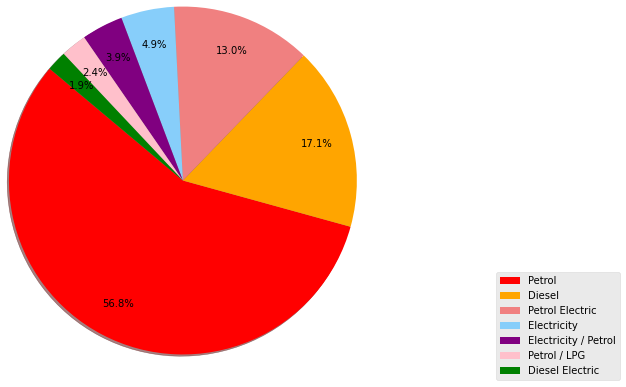

In [20]:
#Plotting a pie chart based on the fuel type popularity in 2022
counts4 = Filtered_df_2022["Fuel Type"].value_counts()
plt.pie(counts4.values, explode=None, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, radius=2, pctdistance = 0.8)

plt.style.use("ggplot")
plt.legend(bbox_to_anchor= (1.02,1), loc="upper left", borderaxespad=20,labels=counts4.index.values )
plt.show() 